In [61]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

#Generate training data

## first generate 10 cluster means for each class:

(-4, 4)

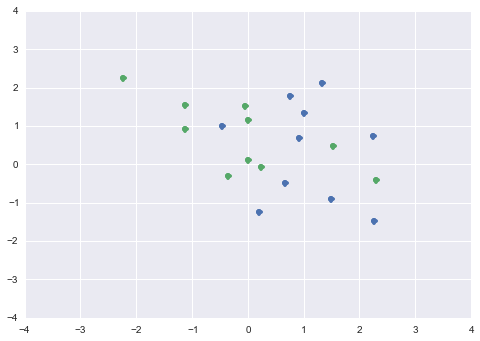

In [89]:
cov = np.identity(2)

#generate blue class:
#    generate m_1, ..., m_10 from N((1,0), I)
mean = [1,0]
blue_m = np.random.multivariate_normal(mean,cov,10)

#generate green class:
#    generate m_1, ..., m_10 from N((0,1), I)
mean = [0,0.5]
green_m = np.random.multivariate_normal(mean,cov,10)

plt.plot(green_m[:,0],green_m[:,1], 'o', color='g')
plt.plot(blue_m[:,0],blue_m[:,1], 'o', color='b')

plt.xlim([-4,4])
plt.ylim([-4,4])

## now generate the training data based on the centers

(-4, 4)

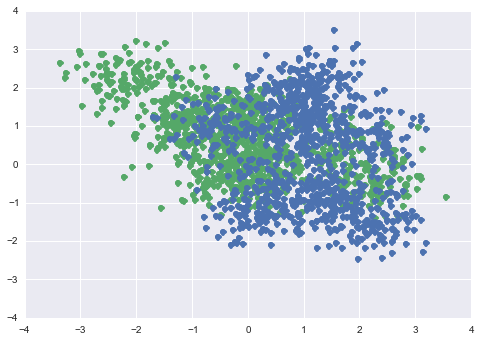

In [90]:
n=1000
#greens:
greens = []
for i in range(n):
    cur_mean = green_m[np.random.randint(0,10)]
    
    new_point = np.random.multivariate_normal(cur_mean,cov/5,1)
    #print new_point
    greens.append(new_point[0])
    
greens = np.array(greens)
plt.plot(greens[:,0],greens[:,1], 'o', color='g')

blues = []
for i in range(n):
    cur_mean = blue_m[np.random.randint(0,10)]
    
    new_point = np.random.multivariate_normal(cur_mean,cov/5,1)
    #print new_point
    blues.append(new_point[0])
    
blues = np.array(blues)
plt.plot(blues[:,0],blues[:,1], 'o', color='b')

plt.xlim([-4,4])
plt.ylim([-4,4])

#LINEAR REGRESSION

###reshape the training data

In [92]:
N=2*n
x_train = np.append(blues, greens)
x_train = x_train.reshape((N,2))
# add column of ones
ones = np.ones(N).reshape((N,1))

x_train = np.append(ones, x_train, axis=1)

y_train = np.append(np.zeros(n), np.ones(n)).reshape((N,1))

##find paramters $\beta$ using normal equation $\beta = (X^TX)^{-1}X^Ty$

In [93]:
from numpy.linalg import inv


beta = np.dot(np.dot(inv(np.dot(x_train.T, x_train)), x_train.T), y_train)
print beta

[[ 0.5927485 ]
 [-0.181411  ]
 [-0.00909103]]


##generate some test data

In [94]:
x_test = np.array([0,0,0])
for x in np.linspace(-4, 4, 50):
    for y in np.linspace(-4, 4, 50):
        x_test = np.vstack((x_test, np.array([1,x,y])))
        
x_test = x_test[1:]


y_test = np.dot(x_test, beta)

##Plot the predictions

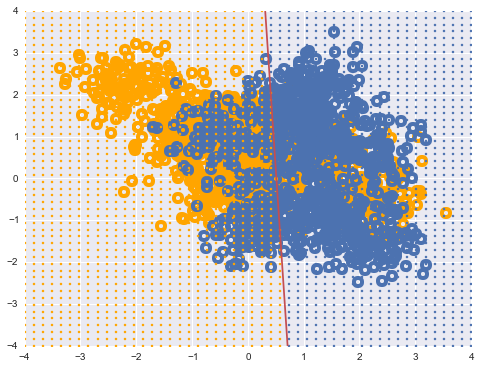

In [95]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)


#plot training data:
ax.plot(greens[:,0],greens[:,1], 'o', markersize=8, markeredgewidth=4, markerfacecolor='none', markeredgecolor='orange')
ax.plot(blues[:,0],blues[:,1], 'o', markersize=8, markeredgewidth=4, markerfacecolor='none', markeredgecolor='b')

plt.xlim([-4,4])
plt.ylim([-4,4])

#plot test data:
for x,y in zip(x_test, y_test):
    if y<0.5:
        ax.plot(x[1], x[2], '.', color='b', markersize=5)
    else:
        ax.plot(x[1], x[2], '.', color='orange', markersize=5)
        
        
#plot the regression line

#0.5 = b_0 + (-4)b_1 + yb_2
#y=(0.5-b_0 + 4b_1)/b_2
p1 = (0.5-beta[0][0] + 4*beta[1][0])/beta[2][0]
p2 = (0.5-beta[0][0] - 4*beta[1][0])/beta[2][0]


#line = plt.Line2D([-4, p1], [4,p2])
#plt.show()
line = plt.Line2D([-4,4], [p1,p2], color='r')
ax.add_line(line)

In [96]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="log", penalty="none", n_iter=1000000)
clf.fit(x_train[:, [1,2]], np.ravel(y_train))

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=1000000, n_jobs=1,
       penalty='none', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [97]:
print beta
beta_SGD = clf.coef_.T
print beta_SGD
print clf.intercept_

[[ 0.5927485 ]
 [-0.181411  ]
 [-0.00909103]]
[[-0.88649531]
 [-0.01529395]]
[ 0.45840397]


In [98]:
y_test = clf.predict(x_test[:, [1,2]])

In [99]:
y_test

array([ 1.,  1.,  1., ...,  0.,  0.,  0.])

In [100]:
clf.predict([-4, -10.25303354 ])

array([ 1.])

[ 261.82808707]
[-201.88228875]


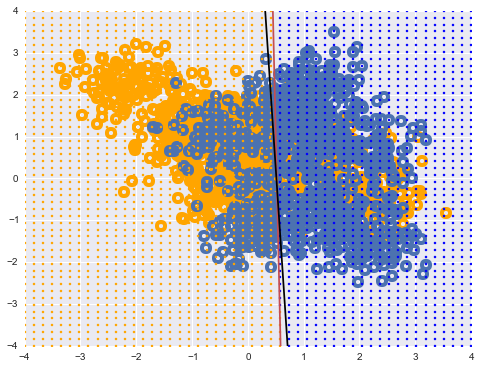

In [101]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)


#plot training data:
ax.plot(greens[:,0],greens[:,1], 'o', markersize=8, markeredgewidth=4, markerfacecolor='none', markeredgecolor='orange')
ax.plot(blues[:,0],blues[:,1], 'o', markersize=8, markeredgewidth=4, markerfacecolor='none', markeredgecolor='b')

plt.xlim([-4,4])
plt.ylim([-4,4])

#plot test data:
for x,y in zip(x_test, y_test):
    if y<=0.5:
        ax.plot(x[1], x[2], '.', color='blue', markersize=5)
    else:
        ax.plot(x[1], x[2], '.', color='orange', markersize=5)
        
        
#plot the regression line

#b0 + b1x1 + b2x2 = 0
#b0 + b1(-4) + b2x2 = 0
# x2 = (4b1-b0)/b2
p1 = (4*beta_SGD[0]-clf.intercept_)/beta_SGD[1]
#b0 + b1(4) + b2x2 = 0
# x2 = (-4b1-b0)/b2
p2 = (-4*beta_SGD[0]-clf.intercept_)/beta_SGD[1]

print p1
print p2
#line = plt.Line2D([-4, p1], [4,p2])
#plt.show()
line = plt.Line2D([-4,4], [p1,p2], color='r')
ax.add_line(line)


p1 = (0.5-beta[0][0] + 4*beta[1][0])/beta[2][0]
p2 = (0.5-beta[0][0] - 4*beta[1][0])/beta[2][0]


#line = plt.Line2D([-4, p1], [4,p2])
#plt.show()
line = plt.Line2D([-4,4], [p1,p2], color='black')
ax.add_line(line)

In [105]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=10000)
clf.fit(x_train[:, [1,2]], np.ravel(y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [106]:
y_test = clf.predict(x_test[:, [1,2]])

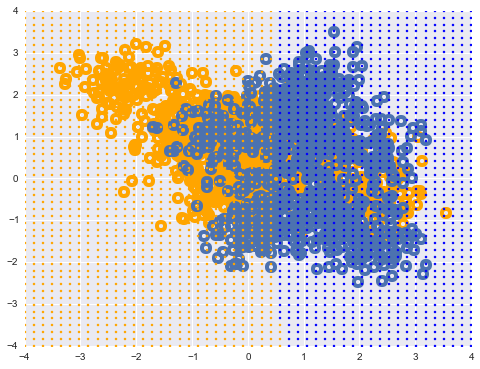

In [107]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)


#plot training data:
ax.plot(greens[:,0],greens[:,1], 'o', markersize=8, markeredgewidth=4, markerfacecolor='none', markeredgecolor='orange')
ax.plot(blues[:,0],blues[:,1], 'o', markersize=8, markeredgewidth=4, markerfacecolor='none', markeredgecolor='b')

plt.xlim([-4,4])
plt.ylim([-4,4])

#plot test data:
for x,y in zip(x_test, y_test):
    if y<=0.5:
        ax.plot(x[1], x[2], '.', color='blue', markersize=5)
    else:
        ax.plot(x[1], x[2], '.', color='orange', markersize=5)
        
        


#K-nearest Neighbours

In [25]:
def knearest(point, xs, k):
    #remove last column, containing class labels
    cleaned = np.delete(xs, -1, 1)
    #print point
    #print cleaned
    
    distances = (np.sum((point - cleaned)**2, axis=1))**0.5
    #print distances
    idxs = np.argsort(distances)[0:k]
    return xs[idxs]

In [26]:
x_train = np.append(blues, greens).reshape((200,2))

y_train = np.append(np.zeros(100), np.ones(100)).reshape((200,1))

#last column contains class
all_train = np.hstack((x_train, y_train))


In [27]:
(-4)

-4

In [28]:
point = np.array([-4,4])
xs = np.array([[  1.35916311e+00,  -3.18849172e-01], [ -1.33181071e-01,   6.97607273e-01]])
(np.sum(point - xs, axis=1))**2

array([ 1.08225309,  0.31857694])

In [31]:
k=5

x_test = np.array([0,0])
for x in np.linspace(-4, 4,151):
    for y in np.linspace(-4, 4, 151):
        x_test = np.vstack((x_test, np.array([x,y])))
        
x_test = x_test[1:]

y_test = []

for x in x_test:
    neighbours = knearest(x, all_train, k)
    vote = np.sum(neighbours[:,-1])
    if vote/k > 0.5:
        y_test.append(1)
    else:
        y_test.append(0)

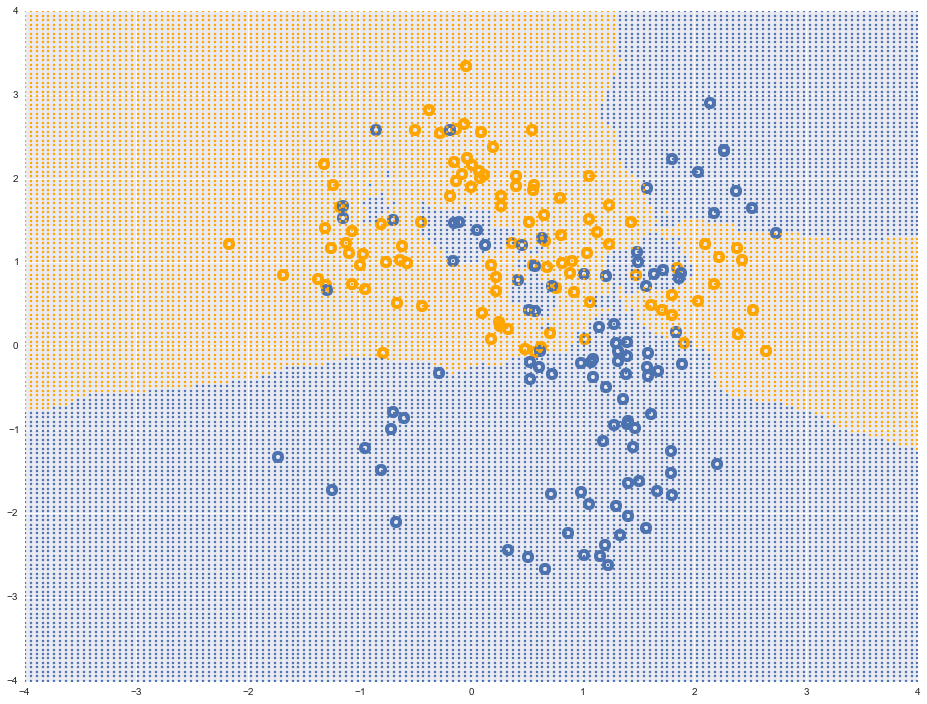

In [32]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)


#plot training data:
ax.plot(greens[:,0],greens[:,1], 'o', markersize=8, markeredgewidth=4, markerfacecolor='none', markeredgecolor='orange')
ax.plot(blues[:,0],blues[:,1], 'o', markersize=8, markeredgewidth=4, markerfacecolor='none', markeredgecolor='b')

plt.xlim([-4,4])
plt.ylim([-4,4])

#plot test data:
for x,y in zip(x_test, y_test):
    if y<0.5:
        ax.plot(x[0], x[1], '.', color='b', markersize=5)
    else:
        ax.plot(x[0], x[1], '.', color='orange', markersize=5)
        
        
